<a href="https://colab.research.google.com/github/Anghsuman123/Cybersecurity-Threat-Detection/blob/main/GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:

# Load training data
train_df = pd.read_csv("KDDTrain+.txt", header=None)
print("Training data shape:", train_df.shape)

# Define column names
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login',
    'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
    'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
    'label', 'score'
]
train_df.columns = columns

# Encode categorical features
categorical_columns = ['protocol_type', 'service', 'flag']
encoders = {}
for col in categorical_columns:
    encoder = LabelEncoder()
    train_df[col] = encoder.fit_transform(train_df[col])
    encoders[col] = encoder

# Convert labels to binary (1 = anomaly, 0 = normal)
y_train = train_df['label'].apply(lambda x: 1 if x != 'normal' else 0)

# Drop non-feature columns
X_train = train_df.drop(columns=['label', 'score'])

# Scale features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  # (samples, timesteps=1, features)


Training data shape: (125973, 43)


In [ ]:

# Build GRU-based model
model = Sequential([
    GRU(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, activation='relu'),
    Dropout(0.3),
    GRU(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, activation='relu'),
    Dropout(0.3),
     GRU(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, activation='relu'),
    Dropout(0.3),
    GRU(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='sigmoid'),
    Dense(16, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_7 (GRU)                          │ (None, 1, 128)              │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_8 (GRU)                          │ (None, 1, 64)               │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_9 (GRU)                          │ (None, 1, 64)               │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_10 (GRU)                         │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 155,457 (607.25 KB)

 Trainable params: 155,457 (607.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=20,
    validation_split=0.1
)

# Save the model
model.save('gru_cybersecurity_model.h5')



Epoch 1/50
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.9108 - loss: 0.2473 - val_accuracy: 0.9781 - val_loss: 0.0718
Epoch 2/50
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.9778 - loss: 0.0657 - val_accuracy: 0.9898 - val_loss: 0.0334
Epoch 3/50
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9852 - loss: 0.0405 - val_accuracy: 0.9899 - val_loss: 0.0292
Epoch 4/50
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9870 - loss: 0.0350 - val_accuracy: 0.9924 - val_loss: 0.0237
Epoch 5/50
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9889 - loss: 0.0297 - val_accuracy: 0.9917 - val_loss: 0.0238
Epoch 6/50
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9900 - loss: 0.0277 - val_accuracy: 0.9924 - val_loss: 0.0227
Epoch 7/50
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9911 - loss: 0.0260 - val_accuracy: 0.9925 - val_loss: 0.0219
Epoch 8/50
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9911 - loss: 0.

In [ ]:
# Load testing data
test_df = pd.read_csv("KDDTest+.txt", header=None)
print("Testing data shape:", test_df.shape)

# Assign column names to match the training dataset
test_df.columns = columns

# Encode categorical features using the same encoders used for training
for col in categorical_columns:
    test_df[col] = encoders[col].transform(test_df[col])

# Convert labels to binary (1 = anomaly, 0 = normal)
y_test = test_df['label'].apply(lambda x: 1 if x != 'normal' else 0)

# Drop non-feature columns
X_test = test_df.drop(columns=['label', 'score'])

# Scale features using the same scaler used for training
X_test = scaler.transform(X_test)

# Reshape data for LSTM
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))  # (samples, timesteps=1, features)


Testing data shape: (22544, 43)


705/705 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.97      0.81      9711
           1       0.97      0.67      0.79     12833

    accuracy                           0.80     22544
   macro avg       0.83      0.82      0.80     22544
weighted avg       0.85      0.80      0.80     22544

Confusion Matrix:
[[9431  280]
 [4247 8586]]


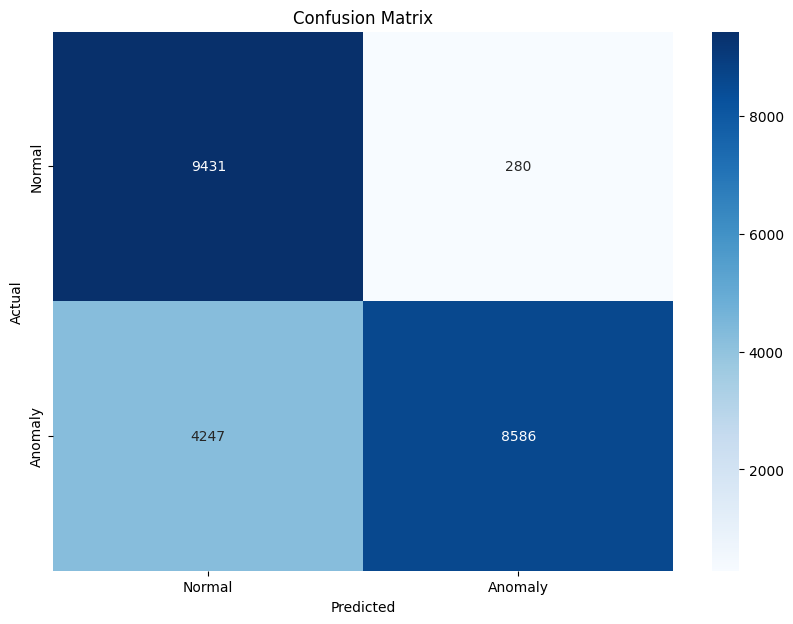

In [ ]:

# Load the model and evaluate on test data
loaded_model = tf.keras.models.load_model('gru_cybersecurity_model.h5')
y_pred = (loaded_model.predict(X_test) > 0.5).astype("int32")

# Calculate metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7832239176721079
Precision: 0.967962308598351
Recall: 0.6403802696173927
F1 Score: 0.7708108615110444


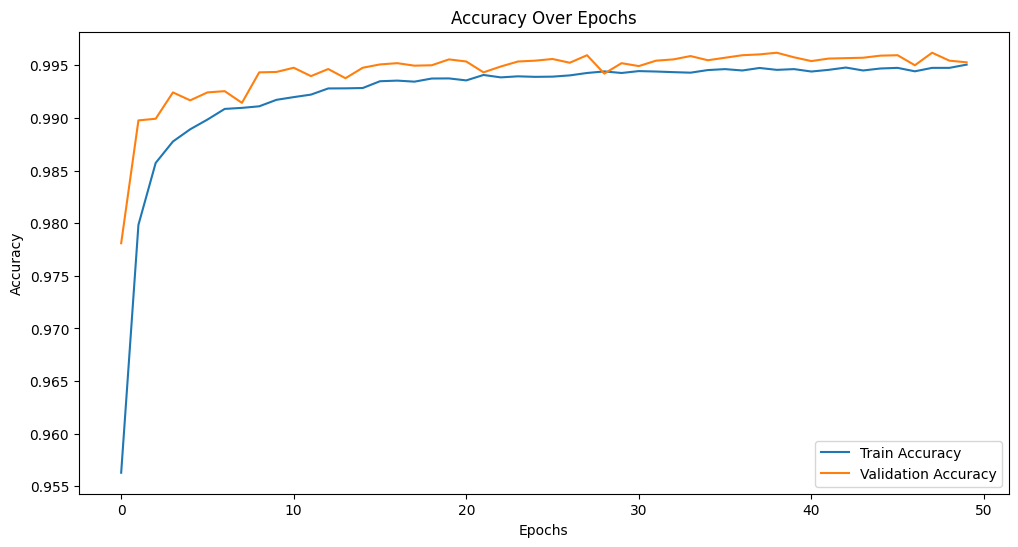

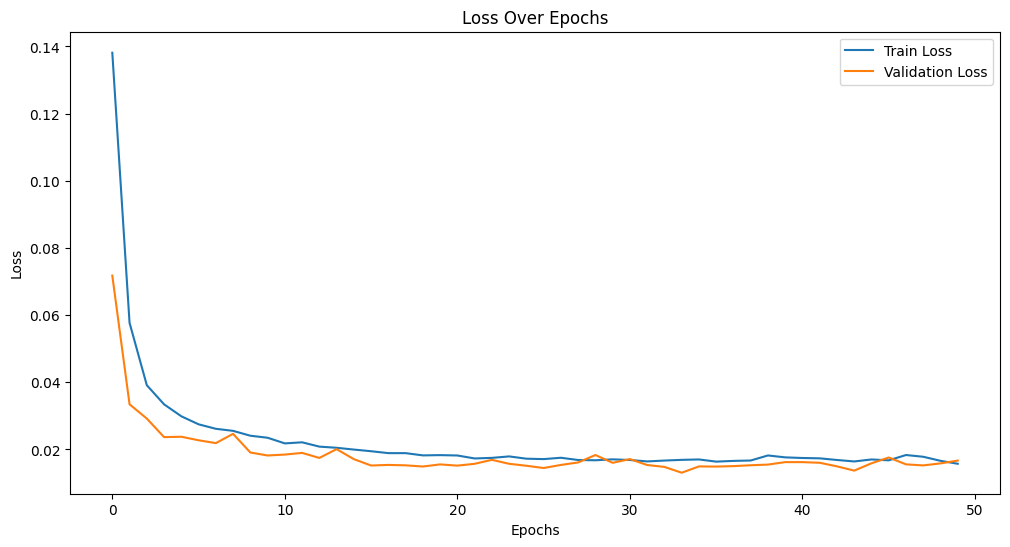

In [ ]:
# Accuracy and Loss Curves
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
